In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
calories=pd.read_csv('/home/zebraking/Downloads/MlProjects/calories.csv')
exercise=pd.read_csv('/home/zebraking/Downloads/MlProjects/exercise.csv')

In [3]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [4]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [5]:
exercise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 937.6+ KB


In [6]:
df=pd.merge(exercise,calories,on='User_ID')

In [7]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [8]:
df['Intercept']=1

In [9]:
df['Gender']=pd.get_dummies(df['Gender'],drop_first=True)

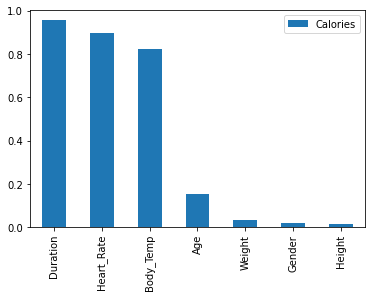

In [10]:
correralation=df.drop(columns=['User_ID','Intercept'],axis=1).copy().corr()['Calories']
correralation=correralation.sort_values(ascending=False).drop('Calories',axis=0)
x=correralation.to_frame()
x.plot.bar()
plt.show()

In [11]:
#here we can see that Duration,heart attack and body temperature has a hight correlation to burn calories

In [12]:
df_3f=df[['Duration','Heart_Rate','Body_Temp','Calories']].copy()
df_6f=df[['Duration','Heart_Rate','Body_Temp','Age','Weight','Height','Calories']].copy()
df_7f=df[['Duration','Heart_Rate','Body_Temp','Age','Weight','Height','Gender','Calories']].copy()

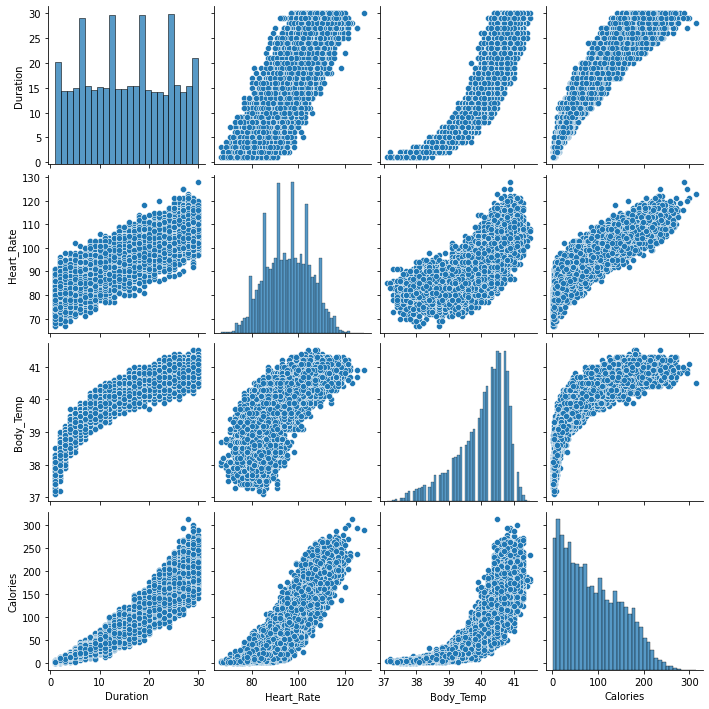

In [13]:
sns.pairplot(df_3f)

In [14]:
# visualizing the data
# as we know if we workout more we will loose calories more


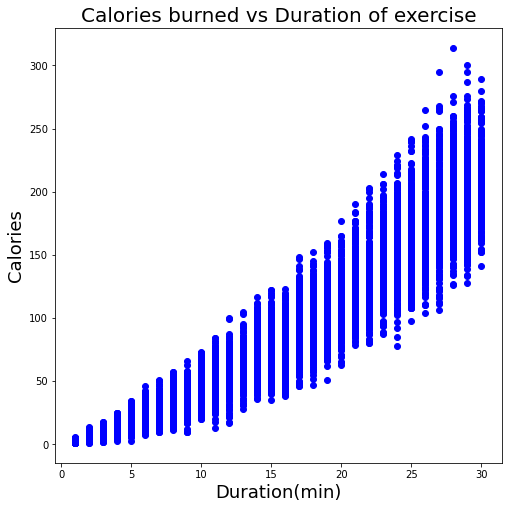

In [15]:
plt.figure(figsize=(8,8))
plt.plot(df['Duration'],df['Calories'],'bo')
plt.xlabel('Duration(min)',size=18)
plt.ylabel('Calories',size=18)
plt.title('Calories burned vs Duration of exercise',size=20)
plt.show()

In [16]:
# lets now we create features and reponses

In [17]:
X=df.loc[:,['Intercept','Duration']]
y=df.loc[:,['Calories']]

In [18]:
X.head(2)

,Intercept,Duration
0,1,29.0
1,1,14.0


In [19]:
# implement tthe linearregression without using the library

In [20]:
def linear_regression(X,y):
     _coeffs = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T, X)), X.T), y)
     return _coeffs
by_hands_coeffs=linear_regression(X.values,y.values)
print('Intercept without using library',by_hands_coeffs[0])
print('Slop without using library',by_hands_coeffs[1])


Intercept without using library [-21.8596564]
Slop without using library [7.17288384]


In [21]:
# implement linear regression with library

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
reg=LinearRegression()

In [24]:
reg.fit(np.array(X.Duration).reshape(-1,1),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
print('Intercept with using library',reg.intercept_)
print('Slop with using library',reg.coef_)

Intercept with using library [-21.8596564]
Slop with using library [[7.17288384]]


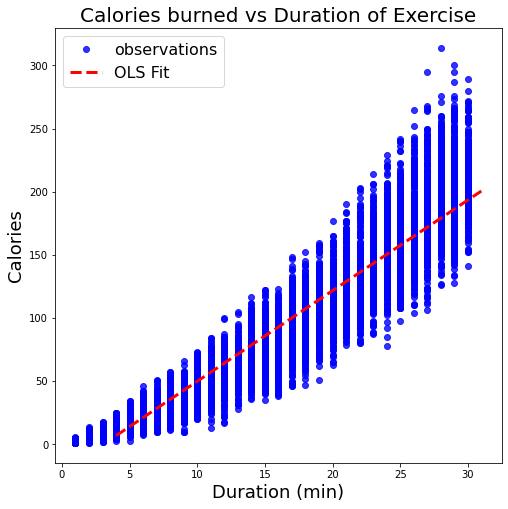

In [26]:
xs = np.linspace(4, 31, 1000)
ys = by_hands_coeffs[0] + by_hands_coeffs[1] * xs

plt.figure(figsize=(8, 8))

plt.plot(df['Duration'], df['Calories'], 'bo',label = 'observations', alpha = 0.8);
plt.xlabel('Duration (min)', size = 18); plt.ylabel('Calories', size = 18); 
plt.plot(xs, ys, 'r--', label = 'OLS Fit', linewidth = 3)
plt.legend(prop={'size': 16})
plt.title('Calories burned vs Duration of Exercise', size = 20);

In [28]:
conditions=True
conditions &=df_3f['Calories']>0
conditions &=df_3f['Duration']>0


In [32]:
df_3f_log = np.log10(df_3f[conditions]).copy()


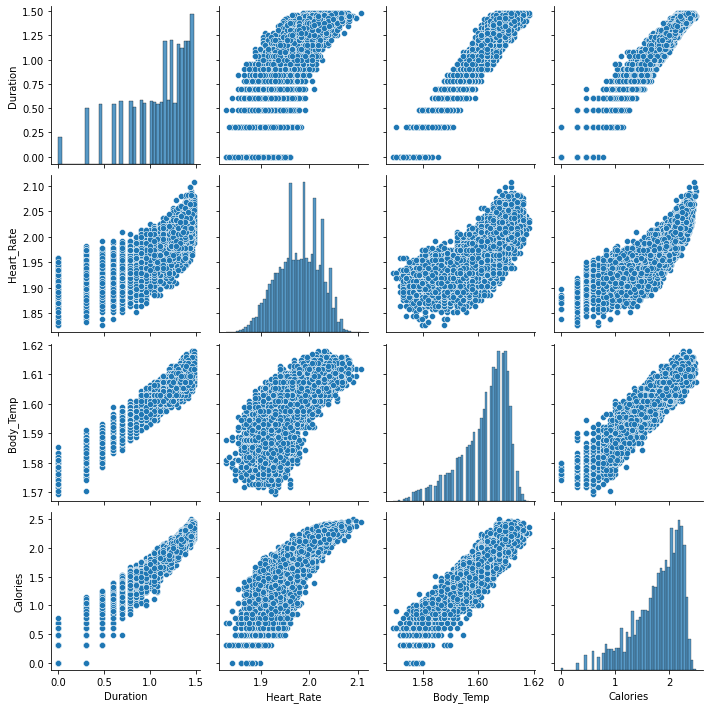

In [30]:
sns.pairplot(df_3f_log)

In [33]:
# one feature regression

In [34]:
calories=df_3f['Calories'].to_numpy()

In [35]:
dur=df_3f['Duration'].to_numpy()

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
dur_train,dur_test,calories_train,calories_test=train_test_split(dur,calories,test_size=0.333,random_state=42)

In [40]:
len(dur_train),len(dur_test),

(10005, 4995)